In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bank_marketing_dataset.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df=df[["age","job","balance","loan","contact"]]

In [ ]:
df.head()

,age,job,balance,loan,contact
0,59,admin.,2343,no,unknown
1,56,admin.,45,no,unknown
2,41,technician,1270,no,unknown
3,55,services,2476,no,unknown
4,54,admin.,184,no,unknown


In [ ]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['job'].unique()


array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["contact"]=le.fit_transform(df["contact"])
df["job"]=le.fit_transform(df["job"])
df["loan"]=le.fit_transform(df["loan"])


In [ ]:
x=df.drop("loan",axis=1)
y=df["loan"]
x.head(),y.head()

(   age  job  balance  contact
 0   59    0     2343        2
 1   56    0       45        2
 2   41    9     1270        2
 3   55    7     2476        2
 4   54    0      184        2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: loan, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

print(accuracy_score(y_test,y_pred))

[[1944    8]
 [ 274    7]]
0.8737124944021496


<Axes: >

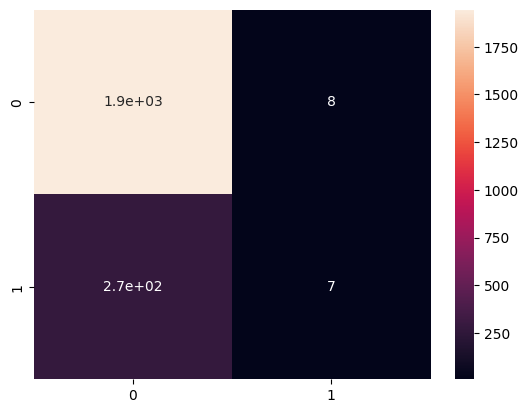

In [ ]:
sns.heatmap(cm,annot=True)

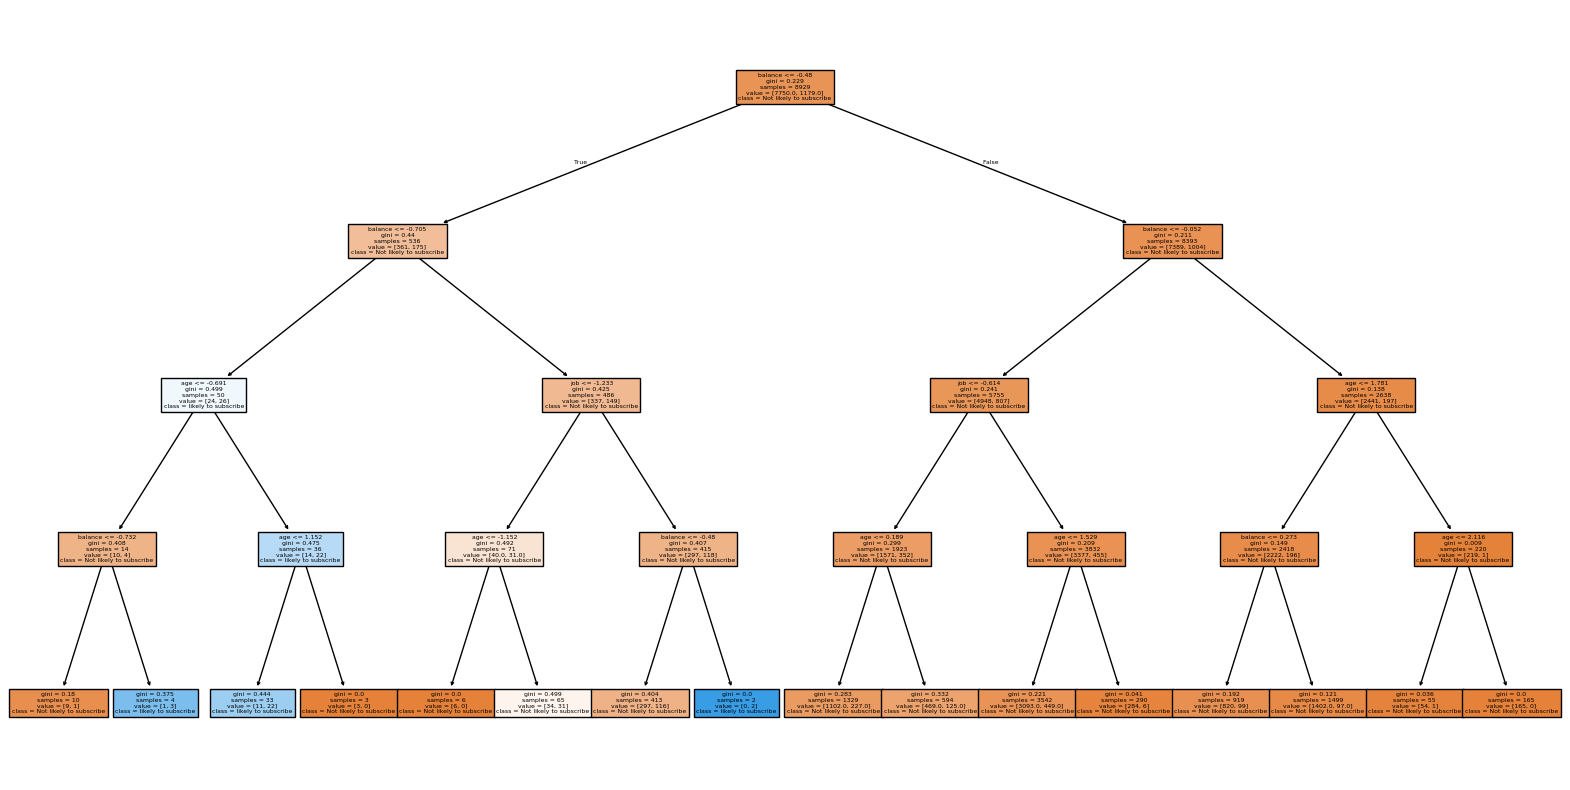

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(classifier,feature_names=x.columns,class_names=["Not likely to subscribe","likely to subscribe"],filled=True)
plt.show()

In [ ]:
new=pd.DataFrame([[30,1,10000,1]],columns=x.columns)
pred=classifier.predict(new)
pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0])

In [ ]:
if pred[0]==1:
  print("Not likely to subscribe")
else:
  print("likely to subscribe")

likely to subscribe
